In [1]:
import os
from pathlib import Path
import pandas as pd
import librosa
import mlflow

# Esto es para poder importar las funciones de src
os.chdir('/Users/antonellaschiavoni/Documents/Antonella/Voice')

In [2]:
# Set MLflow tracking URI
import time


mlflow.set_tracking_uri("file:///Users/antonellaschiavoni/Documents/Antonella/Voice/mlruns")
# Start an MLflow experiment
mlflow.start_run(run_name="Age Prediction Experiment")


start_time = time.time()



<ActiveRun: >

In [3]:
dataset = Path('data/processed/voices_sentences/2.Hour/dataset_librosa.csv')
mlflow.log_param("initial_data_path", str(dataset))
df = pd.read_csv(dataset)


In [4]:
df.head()

,file,gender,duration,words_per_second,tempo,f0_mean,f0_median,f0_std,f0_5perc,f0_95perc,Age
0,data/processed/voices_sentences/2.Hour/M-287_V...,M,1.209688,4.959959,234.375000,125.636571,124.091581,11.131904,110.876943,142.543795,27
1,data/processed/voices_sentences/2.Hour/F-403_V...,F,1.925312,3.116377,187.500000,201.847757,201.587368,23.424754,162.283498,237.937744,19
2,data/processed/voices_sentences/2.Hour/M-306_V...,M,1.390125,4.316159,208.333333,102.369090,106.172139,9.654949,86.738150,117.126856,22
3,data/processed/voices_sentences/2.Hour/M-382_V...,M,1.503500,3.990688,187.500000,136.585858,139.288090,25.564054,103.747164,175.900399,23
4,data/processed/voices_sentences/2.Hour/F-117_V...,F,1.313937,4.566427,187.500000,210.418301,209.905297,20.246442,176.356119,241.538117,19


In [5]:
df["Age"].value_counts().sort_index()

Age
18     9
19    15
20    12
21    15
22    15
23    12
24     2
25     7
26     3
27     3
28     3
29     2
30     3
33     2
34     3
35     2
Name: count, dtype: int64

In [6]:
# create a new column with the aage category 15-19, 20-24,25-29,30-34,35-40 
# df["Age_category"] = pd.cut(df["Age"], bins=[15, 19, 24, 29, 34, 40], labels=["15-19", "20-24", "25-29", "30-34", "35-40"])
# df["Age_category"].value_counts().sort_index()

# create a new column with the aage category 10-19, 20-29, 30-39
df["Age_category"] = pd.cut(df["Age"], bins=[10, 19, 29, 39], labels=["10-19", "20-29", "30-39"])
df["Age_category"].value_counts().sort_index()


Age_category
10-19    24
20-29    74
30-39    10
Name: count, dtype: int64

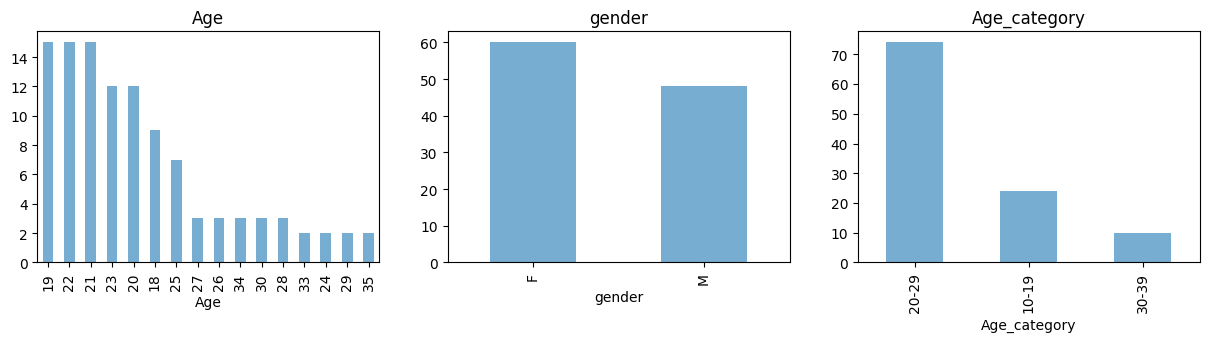

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for i, c in enumerate(["Age", "gender", "Age_category"]):
    # plot the distribution of the age and gender
    df[c].value_counts().plot.bar(title=c, ax=axes[i], alpha=0.6)
plt.show();


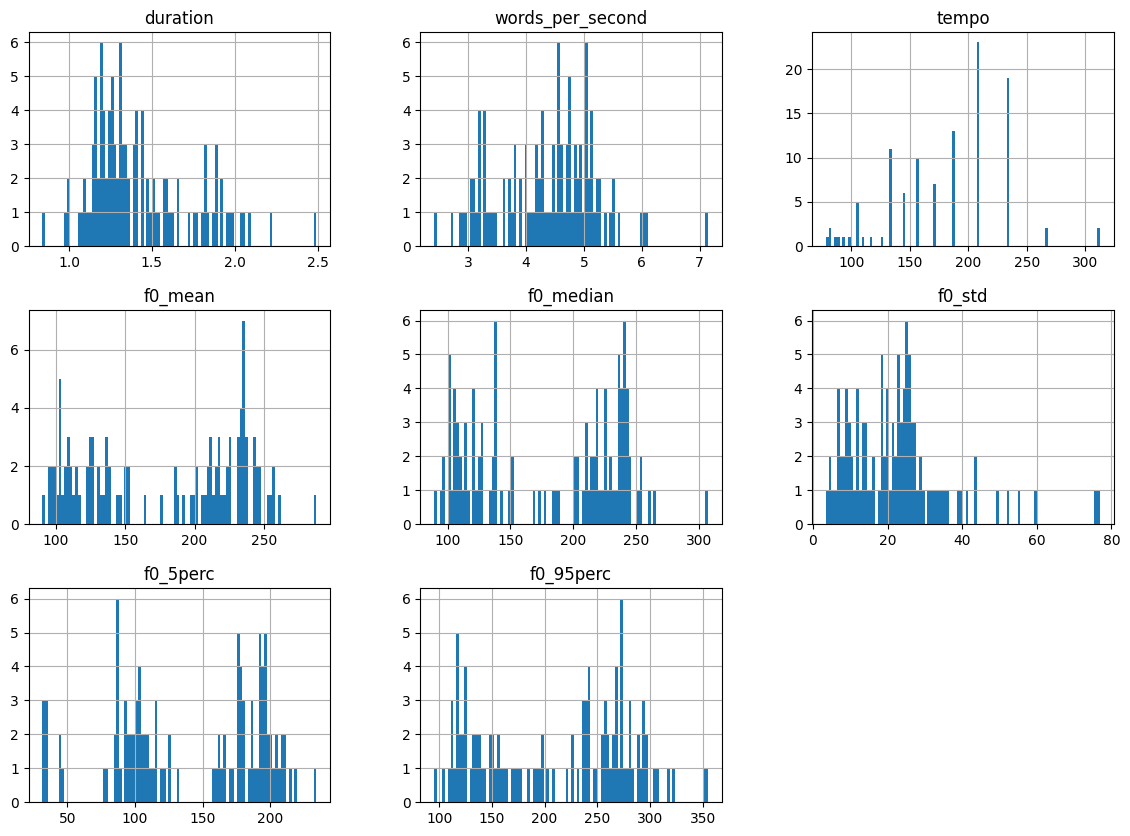

In [8]:
# Plot value distributions of extracted features
df.drop(columns=["Age", "gender", "file"]).hist(bins=100, figsize=(14, 10))
plt.show()

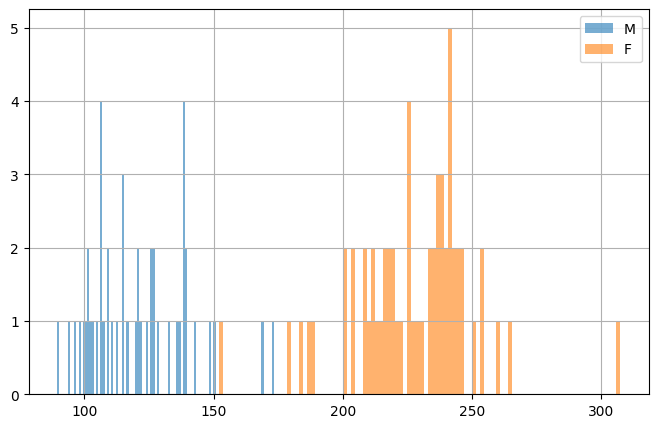

In [9]:
for g in df.gender.unique():
    df[df["gender"].eq(g)]["f0_median"].hist(
        bins=100, figsize=(8, 5), label=g, alpha=0.6)
plt.legend()
plt.show();

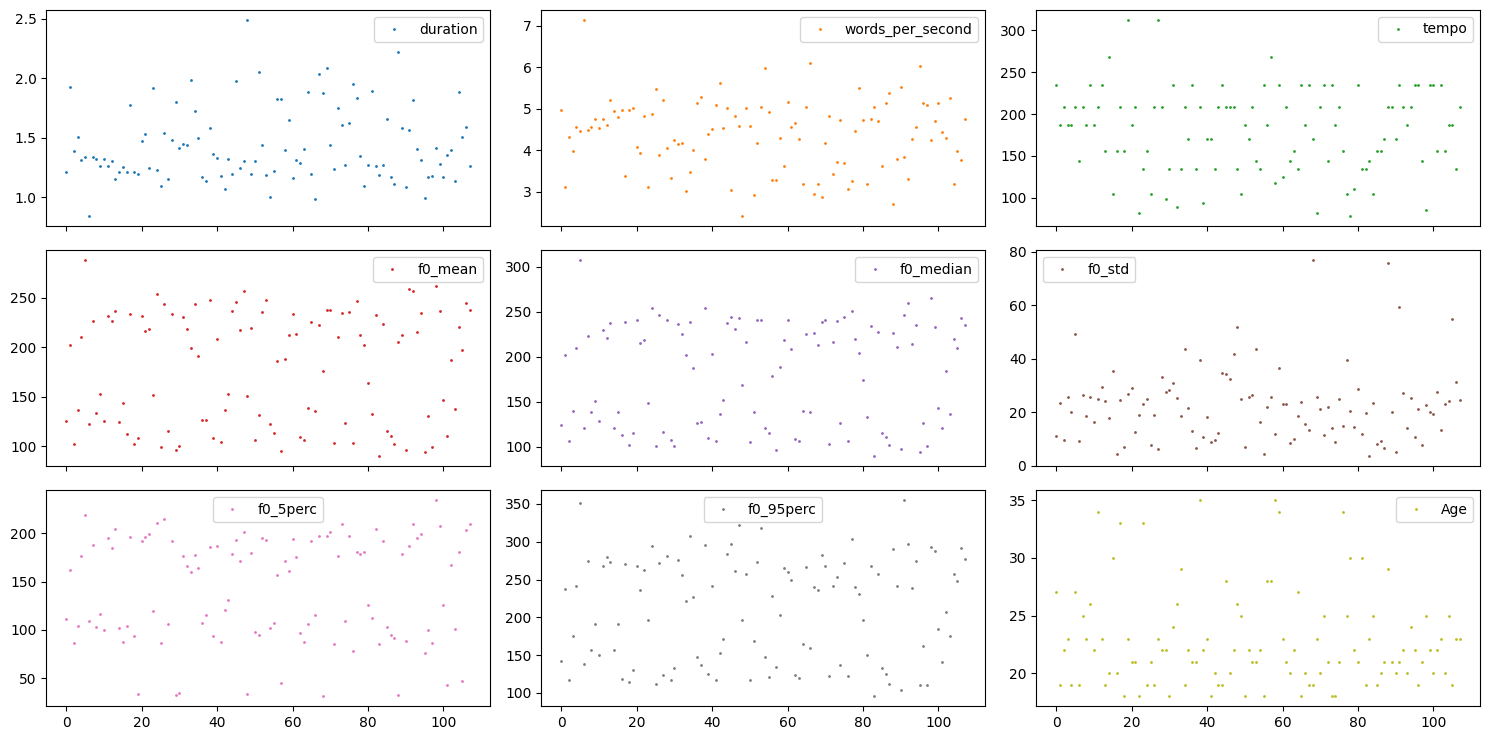

In [10]:
# Plot sample points for each feature individually
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
        figsize=(15, 7.5), markersize=2)
plt.tight_layout()
plt.show();

In [11]:
# Map gender to 0 and 1
df.loc[:, "gender_numeric"] = df["gender"].map({"M": 0.0, "F": 1.0})

In [12]:
df.head()

,file,gender,duration,words_per_second,tempo,f0_mean,f0_median,f0_std,f0_5perc,f0_95perc,Age,Age_category,gender_numeric
0,data/processed/voices_sentences/2.Hour/M-287_V...,M,1.209688,4.959959,234.375000,125.636571,124.091581,11.131904,110.876943,142.543795,27,20-29,0.0
1,data/processed/voices_sentences/2.Hour/F-403_V...,F,1.925312,3.116377,187.500000,201.847757,201.587368,23.424754,162.283498,237.937744,19,10-19,1.0
2,data/processed/voices_sentences/2.Hour/M-306_V...,M,1.390125,4.316159,208.333333,102.369090,106.172139,9.654949,86.738150,117.126856,22,20-29,0.0
3,data/processed/voices_sentences/2.Hour/M-382_V...,M,1.503500,3.990688,187.500000,136.585858,139.288090,25.564054,103.747164,175.900399,23,20-29,0.0
4,data/processed/voices_sentences/2.Hour/F-117_V...,F,1.313937,4.566427,187.500000,210.418301,209.905297,20.246442,176.356119,241.538117,19,10-19,1.0


In [13]:
# Verify that gender_numeric is float
df.dtypes

file                  object
gender                object
duration             float64
words_per_second     float64
tempo                float64
f0_mean              float64
f0_median            float64
f0_std               float64
f0_5perc             float64
f0_95perc            float64
Age                    int64
Age_category        category
gender_numeric       float64
dtype: object

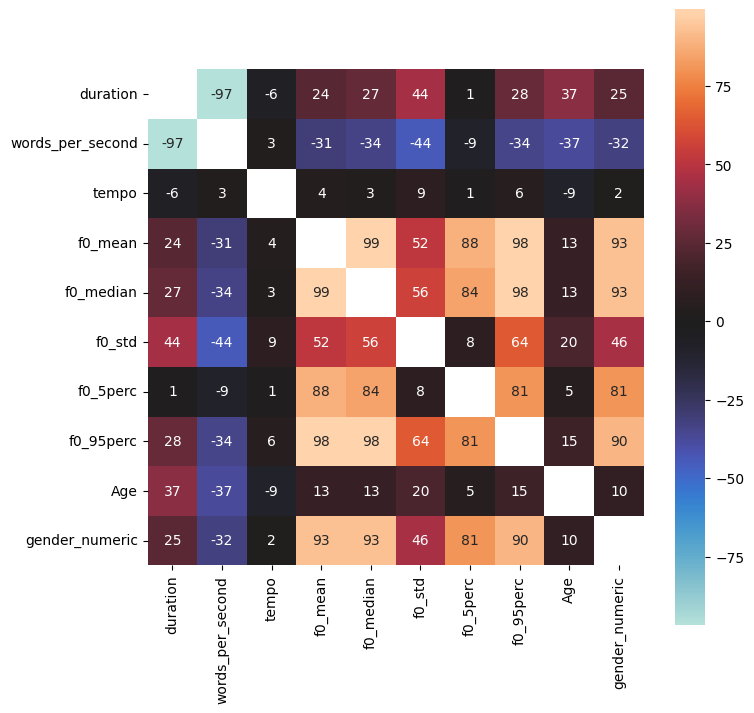

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 8))
df_corr = numeric_df.corr() * 100
sns.heatmap(df_corr, square=True, annot=True, fmt=".0f", mask=np.eye(len(df_corr)), center=0)
plt.show()

### Key Observations
#### Strong Negative Correlations
- **duration and words_per_second (-0.97):** This is the strongest negative correlation in the matrix. It reflects the inverse relationship between the total duration of speech and the speaking rate (words per second). Longer durations correspond to slower speech rates.
- **words_per_second and f0_std (-0.44):** A moderate negative correlation suggests that faster speech rates are associated with less variability in pitch.
- **duration and f0_std (-0.44):** Similarly, longer durations are linked to reduced pitch variability, indicating that slower speakers tend to have more monotonic speech.
#### Strong Positive Correlations
- **Pitch-Related Variables:**
- **f0_mean, f0_median, and f0_95perc:** These variables are highly correlated with each other (e.g., f0_mean and f0_median: 0.99; f0_mean and f0_95perc: 0.98). This shows that they measure similar aspects of pitch, such as central tendency and upper range.
- **f0_5perc with f0_mean, f0_median, and f0_95perc:** Moderate to strong correlations (e.g., 0.88 between f0_5perc and f0_mean) suggest that lower pitch values are also related to overall pitch characteristics.
- **Gender (gender_numeric) and Pitch:** Gender has strong positive correlations with pitch-related variables (e.g., 0.93 with both f0_mean and f0_median). This indicates that gender differences significantly influence pitch, which aligns with known biological differences in vocal frequency between males and females.
- **Age and Duration (0.37):** A moderate positive correlation suggests that older individuals tend to have longer speech durations, possibly due to slower speaking rates or more deliberate articulation.
#### Weak or No Correlations
- **Tempo:** Tempo shows weak correlations with most variables, such as duration (-0.06) and words_per_second (0.03). This suggests that tempo may not be strongly tied to these other features in this dataset.
- **Age:** Age has weak correlations with most variables except for duration (0.37) and words_per_second (-0.37), indicating it might not be a primary driver of variation in pitch or tempo-related features.
#### Patterns and Implications
- **Pitch Variables Are Redundant:** The high correlations among pitch-related variables (f0_mean, f0_median, etc.) suggest redundancy, meaning they capture overlapping information. Feature selection techniques like Principal Component Analysis (PCA) or removing one variable from highly correlated pairs could help reduce multicollinearity in modeling.
- **Speech Rate vs Duration:** The strong inverse relationship between duration and words per second confirms that these two metrics are inherently linked through their mathematical definitions.
- **Gender Differences in Pitch:** The strong correlations between gender and pitch metrics highlight gender as a significant factor influencing vocal characteristics.
- **Age Effects:** While age has some influence on duration and speaking rate, its weak correlations with other variables suggest it might not be a key predictor for voice attractiveness or other outcomes of interest.

# Spectrogram features


The duration in the samples varies, so we need to resize the spectrogram to a fixed duration. Given that the maximum duration shown in the above plots is 2.5 seconds, we will use this value as the default duration for all spectrograms.

In [15]:
def resize_spectrogram(spec, length, fact=-80):

    # Create an empty canvas to put spectrogram into
    canvas = np.ones((len(spec), length)) * fact

    if spec.shape[1] <= length:
        canvas[:, : spec.shape[1]] = spec
    else:
        canvas[:, :length] = spec[:, :length]
    return canvas

def compute_mel_spec(filename, sr=16_000, hop_length=512, duration=2.5):

    # Loads the mp3 file
    y, sr = librosa.load(filename, sr=sr)

    # Compute the mel spectrogram
    x_mel = librosa.feature.melspectrogram(y=y, sr=sr)

    # Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
    x_mel = librosa.power_to_db(x_mel, ref=np.max)

    # Compute mean strength per frequency for mel spectrogram
    mel_strength = np.mean(x_mel, axis=1)

    # Estimate the desired length of the spectrogram
    length = int(duration * sr / hop_length)

    # Put mel spectrogram into the right shape
    x_mel = resize_spectrogram(x_mel, length, fact=-80)

    return x_mel, mel_strength

In [16]:
from tqdm.notebook import tqdm

# Create arrays to store output into
spec_infos = []

# Loop through all files and extract spectrograms
sr = 16000
for f in tqdm(df.file):
    spec_infos.append(compute_mel_spec(f, sr=sr))

# Aggregate feature types in common variable
mels = np.array([s[0] for s in spec_infos])
mels_strengths = np.array([s[1] for s in spec_infos])

  0%|          | 0/108 [00:00<?, ?it/s]

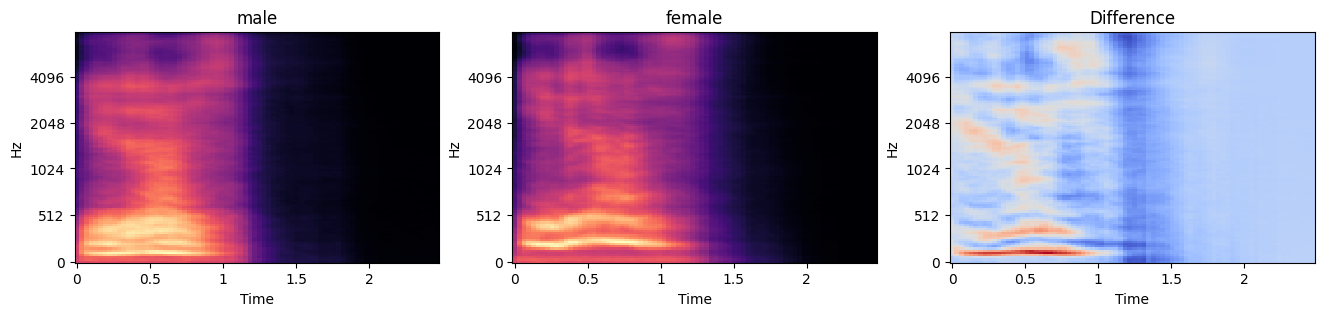

In [17]:
import librosa.display

# Creates a figure with two subplot
fig, axs = plt.subplots(1, 3, figsize=(16, 3))

# Plots mel spectrogram for male speakers
mels_male = np.mean(mels[df["gender_numeric"].eq(0)], axis=0)
librosa.display.specshow(mels_male, sr=sr, x_axis="time", y_axis="mel", ax=axs[0])
axs[0].set_title("male")

# Plots mel spectrogram for female speakers
mels_female = np.mean(mels[df["gender_numeric"].eq(1)], axis=0)
librosa.display.specshow(mels_female, sr=sr, x_axis="time", y_axis="mel", ax=axs[1])
axs[1].set_title("female")

# Plot gender differences
librosa.display.specshow(
    mels_male - mels_female, sr=sr, x_axis="time", y_axis="mel", ax=axs[2]
)
axs[2].set_title("Difference")
plt.show()

### Components of the Spectrogram

#### Male Spectrogram (Left)
- The male voice shows strong energy concentrated in the lower frequency range, particularly below **512 Hz**.  
  - This is consistent with the typically lower **fundamental frequency (f₀)** and harmonics of male voices.  
- There is less energy in higher frequencies (above ~1024 Hz), with these regions appearing darker.  

#### Female Spectrogram (Center)
- The female voice has more energy distributed across a wider frequency range compared to the male voice.  
- The **fundamental frequency (f₀)** and harmonics are higher, with visible energy extending up to **~2048 Hz** and beyond.  
- The overall brightness indicates stronger intensity in higher frequencies compared to the male voice.  

#### Difference Spectrogram (Right)
- The **difference spectrogram** highlights areas where the male and female voices differ in frequency content.  
  - **Blue regions** indicate frequencies where the male voice has more energy.  
  - **Red regions** indicate frequencies where the female voice dominates.  
- Below **512 Hz**, blue regions dominate, showing that males have stronger low-frequency components.  
- Above **~512 Hz**, red regions are more prominent, reflecting the higher-frequency emphasis in female voices.  

---

### Key Observations

#### Fundamental Frequency (f₀)
- The male voice has a **lower f₀** (likely between **85–180 Hz**), while the female voice has a **higher f₀** (typically **165–255 Hz**).  
- This difference is visible in the concentration of energy at different frequency bands.  

#### Harmonics
- Both spectrograms show **harmonics** as horizontal bands above **f₀**.  
- Female voices exhibit **more harmonics extending into higher frequencies** due to their higher pitch.  

#### Energy Distribution
- **Male voices** concentrate energy in **lower frequencies**, which gives them a “deeper” or “bassier” sound.  
- **Female voices** distribute energy across a **broader spectrum**, contributing to their “brighter” or “sharper” sound.  

#### Temporal Dynamics
- Both spectrograms show **changes in intensity over time**, suggesting variations in speech dynamics or phoneme articulation.  

---

### Implications for Voice Attractiveness Analysis

#### Frequency Content
- The differences in frequency distribution between male and female voices could play a role in **perceived attractiveness**. For example:  
  - **Lower frequencies** are often associated with **dominance or warmth** (male traits).  
  - **Higher frequencies** are linked to **clarity or brightness** (female traits).  

#### Feature Extraction
- Features such as:  
  - **Fundamental frequency (f₀)**  
  - **Spectral centroid** (average frequency weighted by intensity)  
  - **Harmonic-to-noise ratio**  
- These could be extracted from the spectrograms to quantify differences.  

#### Attraction Scores
- Investigate whether specific **frequency bands** (e.g., low vs. high) correlate with **attraction scores** for male and female voices separately.  

---

### Next Steps for Analysis

#### Quantify Differences
- Use **spectral analysis** to measure differences in energy across specific frequency bands for male and female voices.  

#### Compare Temporal Patterns
- Examine how **variations over time** (e.g., transitions between phonemes) contribute to differences in **perceived attractiveness**.  

#### Modeling Voice Attractiveness
- Include features derived from these spectrograms (e.g., **spectral centroid, bandwidth, or formant frequencies**) as predictors in your models for **attraction scores**.  


# Machine learning models

## Shallow ML Model

In [18]:
# df.loc[:, "Age_category"] = df["Age_category"].map({
#         "15-19": int(0),
#         "20-24": int(1),
#         "25-29": int(2),
#         "30-34": int(3),
#         "35-40": int(4),
# })

df.loc[:, "Age_category"] = df["Age_category"].map({
        "10-19": int(0),
        "20-29": int(1),
        "30-39": int(2),
})

/var/folders/sf/260b6v5x31x4l659jpkpl6dm0000gn/T/ipykernel_85893/2947496352.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1, 0, 1, 1, 0, ..., 1, 1, 0, 1, 1]
Length: 108
Categories (3, int64): [0 < 1 < 2]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, "Age_category"] = df["Age_category"].map({


In [19]:
# Select target
target = "Age_category"
y = df[target].values

# Assuming 'df' is your DataFrame
df.columns = df.columns.astype(str)

# Select relevant features from the dataframe
features = df.drop(columns=["file", "gender", "Age", target]).reset_index(drop=True)

# Combine them with the mels strength features
X = pd.concat((features, pd.DataFrame(mels_strengths)), axis=1)

# Convert all columns data to float64
X = X.astype(np.float64)

# Convert all columns names to string, otherwise the model will not work and will throw an error
X.columns = X.columns.astype(str)

# check if all columns are float64
# X.info(verbose=True)

print(f"Amount of features: {len(X.columns)}")

Amount of features: 137


In [20]:
from sklearn.model_selection import train_test_split

# Create train and test set
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, train_size=0.8, shuffle=True, stratify=y, random_state=0
)

# Plot size of dataset
print(f"Train set size: {x_tr.shape}")
print(f"Test set size: {x_te.shape}")

# Log the size of the train and test sets
mlflow.log_param("train_set_size", x_tr.shape)
mlflow.log_param("test_set_size", x_te.shape)



Train set size: (86, 137)
Test set size: (22, 137)


(22, 137)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create pipeline
pipe = Pipeline(
    [
        ("scaler", RobustScaler()),
        ("pca", PCA()),
        ("logreg", LogisticRegression(class_weight="balanced")),
    ]
)

# Create grid
grid = {
    "scaler": [RobustScaler(), PowerTransformer(), QuantileTransformer()],
    "pca": [None, PCA(0.99)],
    "logreg__C": np.logspace(-3, 2, num=16),
}

# Create GridSearchCV
grid_cv = GridSearchCV(pipe, grid, cv=4, return_train_score=True, verbose=1)



In [29]:
mlflow.log_param("grid_search_parameters", grid)

{'scaler': [RobustScaler(), PowerTransformer(), QuantileTransformer()],
 'pca': [None, PCA(n_components=0.99)],
 'logreg__C': array([1.00000000e-03, 2.15443469e-03, 4.64158883e-03, 1.00000000e-02,
        2.15443469e-02, 4.64158883e-02, 1.00000000e-01, 2.15443469e-01,
        4.64158883e-01, 1.00000000e+00, 2.15443469e+00, 4.64158883e+00,
        1.00000000e+01, 2.15443469e+01, 4.64158883e+01, 1.00000000e+02])}

In [22]:
# Train GridSearchCV
model = grid_cv.fit(x_tr, y_tr)

# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_cv.cv_results_)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


/Users/antonellaschiavoni/Library/Caches/pypoetry/virtualenvs/voice-ZBJ8r7cX-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (64). n_quantiles is set to n_samples.
  warnings.warn(
/Users/antonellaschiavoni/Library/Caches/pypoetry/virtualenvs/voice-ZBJ8r7cX-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (64). n_quantiles is set to n_samples.
  warnings.warn(
/Users/antonellaschiavoni/Library/Caches/pypoetry/virtualenvs/voice-ZBJ8r7cX-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (65). n_quantiles is set to n_samples.
  warnings.warn(
/Users/antonellaschiavoni/Library/Caches/pypoetry/virtualenvs/voice-ZBJ8r7cX-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2829: User

In [32]:
# Log cross-validation metrics
cv_results = grid_cv.cv_results_
for i in range(len(cv_results['params'])):
    with mlflow.start_run(nested=True):
        mlflow.log_params(cv_results['params'][i])
        mlflow.log_metric("mean_test_score", 
                         cv_results['mean_test_score'][i])

In [31]:
from mlflow.models.signature import infer_signature

 # Infer model signature
signature = infer_signature(x_tr, model.predict(x_tr))

# Register the model
mlflow.sklearn.log_model(sk_model=model, artifact_path="model", input_example=x_tr.iloc[0], signature=signature)

MlflowException: Expected one of the following types:
- pandas.DataFrame
- numpy.ndarray
- dictionary of (name -> numpy.ndarray)
- scipy.sparse.csr_matrix
- scipy.sparse.csc_matrix
- dict
- list
- scalars
- datetime.datetime
- pydantic model instance
but got '<class 'pandas.core.series.Series'>'

In [23]:
# Assuming 'model' is your trained model from GridSearchCV
mlflow.log_metric("best_score", model.best_score_)

# For logging the best parameters, you need to convert them into a string or log them individually
best_params = model.best_params_
for param, value in best_params.items():
    mlflow.log_param(param, value)

# If you want to log the best estimator, you might need to serialize it or log specific attributes
# For example, logging the type of the best estimator:
mlflow.log_param("best_estimator", str(model.best_estimator_))

"Pipeline(steps=[('scaler', PowerTransformer()), ('pca', PCA(n_components=0.99)),\n                ('logreg',\n                 LogisticRegression(C=4.6415888336127775,\n                                    class_weight='balanced'))])"

In [24]:
# Select the columns we are interested in
col_of_interest = [
    "param_scaler",
    "param_pca",
    "param_logreg__C",
    "mean_test_score",
    "mean_train_score",
    "std_test_score",
    "std_train_score",
]
cv_results = cv_results[col_of_interest]

# Show the dataframe sorted according to our performance metric
cv_results.sort_values("mean_test_score", ascending=False)

,param_scaler,param_pca,param_logreg__C,mean_test_score,mean_train_score,std_test_score,std_train_score
70,PowerTransformer(),PCA(n_components=0.99),4.641589,0.499459,1.000000,0.043971,0.000000
76,PowerTransformer(),PCA(n_components=0.99),10.000000,0.499459,1.000000,0.043971,0.000000
64,PowerTransformer(),PCA(n_components=0.99),2.154435,0.488636,0.996154,0.052316,0.006662
88,PowerTransformer(),PCA(n_components=0.99),46.415888,0.488095,1.000000,0.048048,0.000000
82,PowerTransformer(),PCA(n_components=0.99),21.544347,0.488095,1.000000,0.048048,0.000000
...,...,...,...,...,...,...,...
9,RobustScaler(),PCA(n_components=0.99),0.002154,0.231602,0.461478,0.041126,0.114127
8,QuantileTransformer(),None,0.002154,0.230519,0.430769,0.087662,0.139975
5,QuantileTransformer(),PCA(n_components=0.99),0.001000,0.230519,0.411358,0.087662,0.133189
3,RobustScaler(),PCA(n_components=0.99),0.001000,0.220779,0.411178,0.018045,0.122604


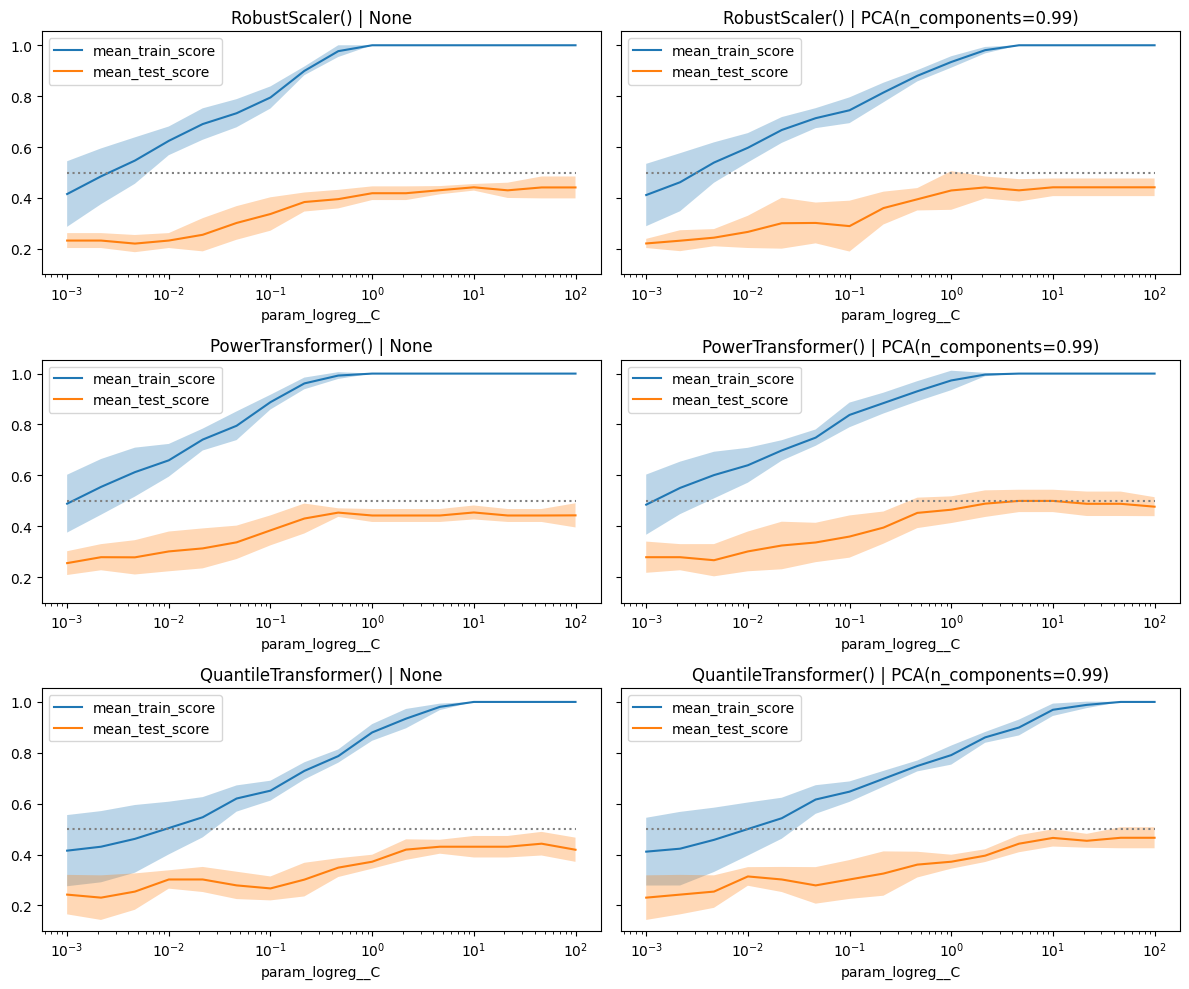

In [25]:
from itertools import product

# Establish combinations of different hyperparameters, that isn't the one
# we want to plot on the x-axis
combinations = list(product(grid["scaler"], grid["pca"]))

# Creates a figure with multiple subplot
fig, axs = plt.subplots(
    len(grid["scaler"]), len(grid["pca"]), figsize=(12, 10), sharey=True)

# Extract useful information about max performance
max_score = cv_results["mean_test_score"].max()
c_values = cv_results["param_logreg__C"]

# Loop through the subplots and populate them
for i, (s, p) in enumerate(combinations):

    # Select subplot relevant grid search results
    mask = np.logical_and(
        cv_results["param_pca"].astype("str") == str(p),
        cv_results["param_scaler"].astype("str") == str(s),
    )
    df_cv = cv_results[mask].sort_values("param_logreg__C").set_index("param_logreg__C")

    # Select relevant axis
    ax = axs.flatten()[i]

    # Plot train and test curves
    df_cv[["mean_train_score", "mean_test_score"]].plot(
        logx=True, title=f"{s} | {p}", ax=ax)
    ax.fill_between(
        df_cv.index,
        df_cv["mean_train_score"] - df_cv["std_train_score"],
        df_cv["mean_train_score"] + df_cv["std_train_score"],
        alpha=0.3,)
    ax.fill_between(
        df_cv.index,
        df_cv["mean_test_score"] - df_cv["std_test_score"],
        df_cv["mean_test_score"] + df_cv["std_test_score"],
        alpha=0.3,)

    # Plot best performance metric as dotted line
    ax.hlines(
        max_score, c_values.min(), c_values.max(), color="gray", linestyles="dotted")

# Limit y-axis
plt.tight_layout()
plt.show()

In [26]:
# Log the plot
mlflow.log_figure(fig, "grid_search_plot.png")
mlflow.end_run()

In [ ]:
#log duration of the experiment
mlflow.log_param("duration", time.time() - start_time)